In [77]:
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [78]:
flower_photos_dir = pathlib.Path("flower_photos")

In [26]:
roses_folder = flower_photos_dir / "roses"
roses_images = list(roses_folder.glob('*'))

In [29]:
len(roses_images)

641

flower_photos\roses\10090824183_d02c613f10_m.jpg


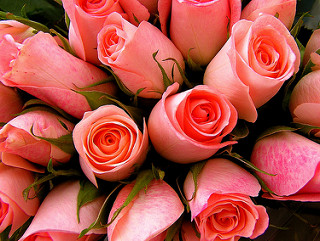

In [38]:
print(roses_images[0])
PIL.Image.open(str(roses_images[8]))

In [ ]:
img_height,img_width=180,180
batch_size=32
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    './flower_photos',
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical'  
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [94]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    './flower_photos',
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical'  
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [95]:
class_names = train_data.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


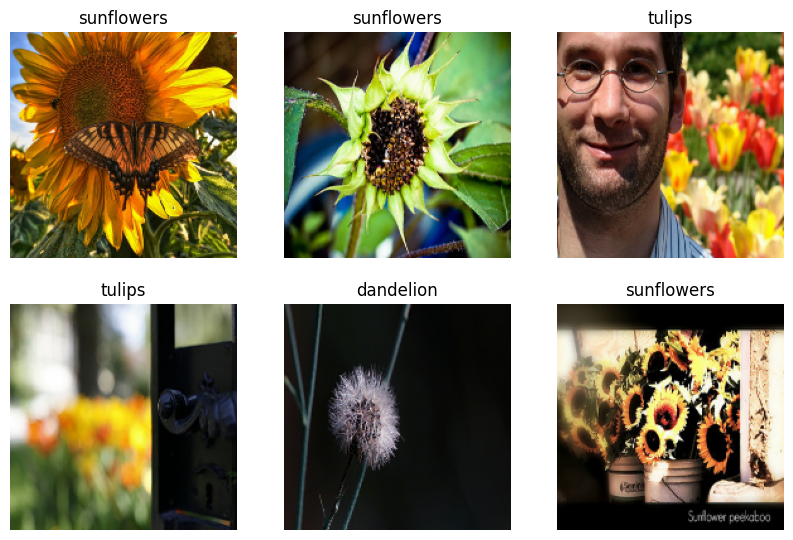

In [ ]:
import matplotlib.pyplot as plt

# Get class names from the dataset
class_names = train_data.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        class_index = tf.argmax(labels[i]).numpy()
        
        plt.title(class_names[class_index])
        plt.axis("off")


# Training

In [98]:
from tensorflow.keras.layers import Flatten, Dense
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(5, activation='softmax'))

resnet_model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 2048)           │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,639,365 (93.99 MB)

 Trainable params: 1,051,653 (4.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [99]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001), 
                     loss='categorical_crossentropy', 
                     metrics=['accuracy'])

In [100]:
epochs=10
history = resnet_model.fit(
  train_data,
  validation_data=val_data,
  epochs=epochs
)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 159s 2s/step - accuracy: 0.6454 - loss: 1.4015 - val_accuracy: 0.8542 - val_loss: 0.3931
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - accuracy: 0.8753 - loss: 0.3252 - val_accuracy: 0.8215 - val_loss: 0.4841
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 155s 2s/step - accuracy: 0.9264 - loss: 0.2020 - val_accuracy: 0.8447 - val_loss: 0.4252
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.9476 - loss: 0.1395 - val_accuracy: 0.8556 - val_loss: 0.4126
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.9724 - loss: 0.0876 - val_accuracy: 0.8896 - val_loss: 0.3593
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.9898 - loss: 0.0422 - val_accuracy: 0.8787 - val_loss: 0.3944
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 156s 2s/step - accuracy: 0.9962 - loss: 0.0260 - val_accuracy: 0.8774 - val_loss: 0.3932
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.9982 - loss: 0.0146 - val_accuracy: 0.8869 - v

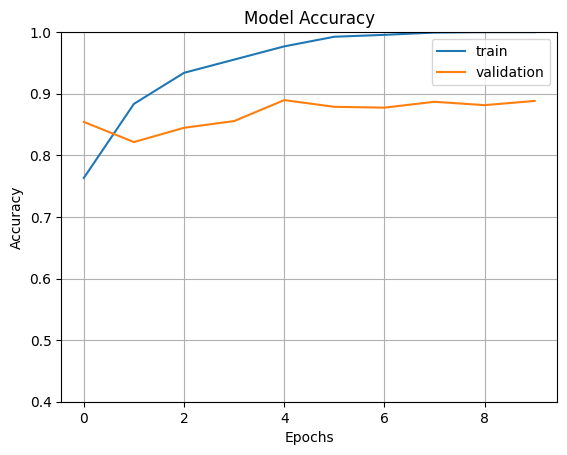

In [101]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()
     

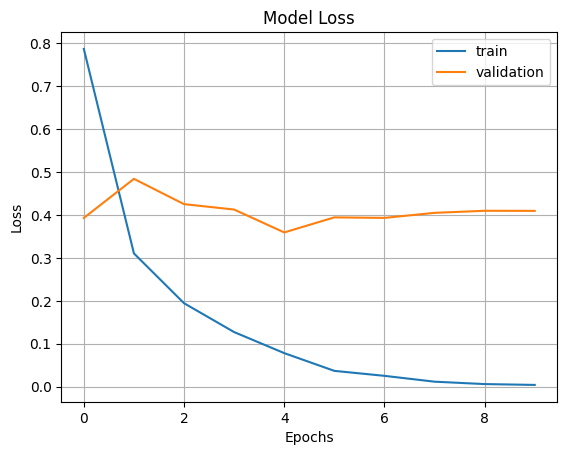

In [102]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()
